### 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import datetime as dt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import tree

### 2.Reading Datset

In [5]:
train=pd.read_csv('Desktop/Analytics_Vidhya/Jobathon June/train_wn75k28.csv')

In [6]:
test=pd.read_csv('Desktop/Analytics_Vidhya/Jobathon June/test_Wf7sxXF.csv')
submission=pd.read_csv('Desktop/Analytics_Vidhya/Jobathon June/sample_submission_2zvVjBu.csv')

### 3.Checking for missing values and outliers

In [7]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [8]:
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
submission.head()

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1


In [10]:
train.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [11]:
test.isna().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [12]:
train.shape

(39161, 19)

In [13]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [14]:
train['created_at'].value_counts()

2021-12-26    181
2021-12-09    180
2021-12-21    179
2021-12-07    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 365, dtype: int64

### 4.Missing Value Treatment

Missing values in columns **product purchased** and **signup date** are  more than half of the datapoints present.
Hence rather imputing values with mean,mode or median,0 as a placeholder is used in **product purchased** 

In [12]:
train['products_purchased']=train['products_purchased'].fillna(0)

In [14]:
test['products_purchased']=test['products_purchased'].fillna(0)

In [18]:
train['products_purchased']=train['products_purchased'].astype('int')
test['products_purchased']=test['products_purchased'].astype('int')


In [19]:
train['signup_date']=train['signup_date'].fillna(train['created_at'][0])

In [20]:
test['signup_date']=test['signup_date'].fillna(test['created_at'][0])

In [21]:
test['signup_date'].head()

0    2021-08-17
1    2020-05-21
2    2022-01-01
3    2020-06-22
4    2021-03-10
Name: signup_date, dtype: object

In [23]:
train['created_at']=pd.to_datetime(train['created_at'])

In [24]:
test['created_at']=pd.to_datetime(test['created_at'])

In [25]:
train['signup_date']=pd.to_datetime(train['signup_date'])
test['signup_date']=pd.to_datetime(test['signup_date'])

### 5.Extracting features from Datetime columns

In [26]:
train['sub_days']=train['created_at']-train['signup_date']
test['sub_days']=test['created_at']-test['signup_date']

In [27]:
train['sub_days'].head(20)

0      99 days
1     104 days
2    -222 days
3    1185 days
4     207 days
5     549 days
6     527 days
7      20 days
8     925 days
9    -292 days
10    725 days
11      0 days
12    389 days
13   1434 days
14    609 days
15    -67 days
16     62 days
17   -292 days
18   1177 days
19     71 days
Name: sub_days, dtype: timedelta64[ns]

In [28]:
test['sub_days']

0       137 days
1       590 days
2         0 days
3       558 days
4       297 days
          ...   
13179    88 days
13180    11 days
13181   227 days
13182    88 days
13183    88 days
Name: sub_days, Length: 13184, dtype: timedelta64[ns]

In [29]:
train['signup_dom']=train['signup_date'].dt.day
test['signup_dom']=test['signup_date'].dt.day

In [30]:
train['signup_month']=train['signup_date'].dt.month
test['signup_month']=test['signup_date'].dt.month

In [31]:
train['signup_year']=train['signup_date'].dt.year
test['signup_year']=test['signup_date'].dt.year

In [32]:
train['signup_dow']=train['signup_date'].dt.dayofweek
test['signup_dow']=test['signup_date'].dt.dayofweek

In [33]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,sub_days,signup_dom,signup_month,signup_year,signup_dow
0,1,2021-01-01,1,2,2,2020-09-24,0,0,0,0,...,0,0,0,0,0,99 days,24,9,2020,3
1,2,2021-01-01,2,1,2,2020-09-19,1,0,1,0,...,0,0,0,0,0,104 days,19,9,2020,5
2,3,2021-01-01,9,3,3,2021-08-11,1,0,0,0,...,0,0,0,0,0,-222 days,11,8,2021,2
3,4,2021-01-01,6,7,2,2017-10-04,0,0,0,0,...,0,0,0,0,0,1185 days,4,10,2017,2
4,5,2021-01-01,4,6,0,2020-06-08,0,0,0,0,...,0,0,1,0,0,207 days,8,6,2020,0


In [35]:
train['sub_days']=train['sub_days'].astype('timedelta64[D]')
train['sub_days']=train['sub_days']//np.timedelta64(1, 'D')

In [37]:
test['sub_days']=test['sub_days'].astype('timedelta64[D]')
test['sub_days']=test['sub_days']//np.timedelta64(1, 'D')

### 6.Removing unnecessary features from datasets

In [38]:
test['sub_days']=test['sub_days'].astype('int')

In [39]:
train['sub_days']=train['sub_days'].astype('int')

In [40]:
test1=test.drop(['id','created_at','signup_date'],axis=1)

In [41]:
target=train['buy']

In [42]:
train1=train.drop(['id','created_at','signup_date','buy'],axis=1)

In [43]:
train1.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,sub_days,signup_dom,signup_month,signup_year,signup_dow
0,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0,99,24,9,2020,3
1,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0,104,19,9,2020,5
2,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0,-222,11,8,2021,2
3,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,1185,4,10,2017,2
4,4,6,0,0,0,0,0,0,0,1,0,0,0,1,0,207,8,6,2020,0


In [44]:
test1.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,sub_days,signup_dom,signup_month,signup_year,signup_dow
0,2,2,0,1,1,0,0,0,1,0,0,0,0,1,0,137,17,8,2021,1
1,4,7,3,1,0,0,0,0,0,0,1,0,0,0,0,590,21,5,2020,3
2,8,7,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,2022,5
3,9,8,2,0,0,0,0,1,1,1,0,0,0,2,0,558,22,6,2020,0
4,4,5,2,1,0,0,0,0,0,0,0,0,0,0,0,297,10,3,2021,2


### 7.Model Fitting and Training

#### a) Decision Trees

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train1,target,random_state=0)

In [48]:
model1=tree.DecisionTreeClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV
params = {"max_depth": np.arange(1,10), "min_samples_split": [100,200,300,400,500,1000,700,800,900]}
grid = GridSearchCV(estimator=model1,param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.9746339802519577
DecisionTreeClassifier(max_depth=5, min_samples_split=100)


In [50]:
model1=tree.DecisionTreeClassifier(max_depth=5,min_samples_split=100)

In [51]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=100)

[Text(0.6538461538461539, 0.9166666666666666, 'X[11] <= 0.5\ngini = 0.096\nsamples = 29370\nvalue = [27879, 1491]'),
 Text(0.5769230769230769, 0.75, 'X[6] <= 0.5\ngini = 0.076\nsamples = 29027\nvalue = [27879, 1148]'),
 Text(0.38461538461538464, 0.5833333333333334, 'X[4] <= 0.5\ngini = 0.063\nsamples = 28757\nvalue = [27827, 930]'),
 Text(0.3076923076923077, 0.4166666666666667, 'X[13] <= 1.5\ngini = 0.054\nsamples = 28624\nvalue = [27827, 797]'),
 Text(0.15384615384615385, 0.25, 'X[13] <= 0.5\ngini = 0.048\nsamples = 28522\nvalue = [27826, 696]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.027\nsamples = 22834\nvalue = [22523, 311]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.126\nsamples = 5688\nvalue = [5303, 385]'),
 Text(0.46153846153846156, 0.25, 'X[0] <= 8.5\ngini = 0.019\nsamples = 102\nvalue = [1, 101]'),
 Text(0.38461538461538464, 0.08333333333333333, 'gini = 0.0\nsamples = 90\nvalue = [0, 90]'),
 Text(0.5384615384615384, 0.08333333333333333, 'gi

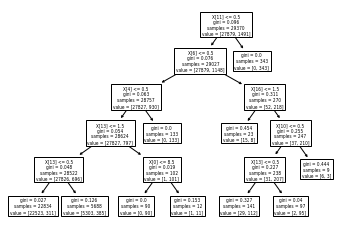

In [52]:
tree.plot_tree(model1)

In [57]:
pred_tree=model1.predict(X_test)

In [58]:
from sklearn.metrics import classification_report


In [59]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9284
           1       0.97      0.51      0.67       507

    accuracy                           0.97      9791
   macro avg       0.97      0.76      0.83      9791
weighted avg       0.97      0.97      0.97      9791



In [60]:
from sklearn.metrics import confusion_matrix


In [61]:
print(confusion_matrix(y_test,pred_tree))

[[9275    9]
 [ 247  260]]


In [62]:
tree_predictions=model1.predict(test1)

In [63]:
submission.head()

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1


In [64]:
submission['buy']=tree_predictions

In [65]:
submission.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [66]:
submission.to_csv('Desktop/Analytics_Vidhya/Jobathon June/S_tree.csv',index=False)

### b) Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
params = {"max_depth": np.arange(1,10), "min_samples_split": [2,5,10],"n_estimators":[100]}
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.9751447054817841
RandomForestClassifier(max_depth=7)


In [69]:
rf_val=grid.predict(X_test)

In [70]:
print(classification_report(y_test,rf_val))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9284
           1       0.97      0.52      0.68       507

    accuracy                           0.97      9791
   macro avg       0.97      0.76      0.83      9791
weighted avg       0.97      0.97      0.97      9791



In [71]:
rf_predictions=grid.predict(test1)

In [72]:
submission['buy']=rf_predictions

In [73]:
submission.to_csv('Desktop/Analytics_Vidhya/Jobathon June/S_rf.csv',index=False)

### c) AdaBoost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
Abc=AdaBoostClassifier()

In [55]:
Abc.fit(X_train,y_train)

AdaBoostClassifier()

In [56]:
Abc_val=Abc.predict(X_test)

In [59]:
print(classification_report(y_test,Abc_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9284
           1       0.96      0.54      0.69       507

    accuracy                           0.97      9791
   macro avg       0.97      0.77      0.84      9791
weighted avg       0.97      0.97      0.97      9791



In [93]:
Abc2=AdaBoostClassifier(learning_rate=1.1)

In [94]:
Abc2.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1.1)

In [95]:
Abc2_val=Abc2.predict(X_test)

In [96]:
print(classification_report(y_test,Abc2_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9284
           1       0.95      0.55      0.69       507

    accuracy                           0.97      9791
   macro avg       0.96      0.77      0.84      9791
weighted avg       0.97      0.97      0.97      9791



In [97]:
adaboost_predictions=Abc.predict(test1)

In [98]:
submission['buy']=adaboost_predictions

In [99]:
submission.to_csv('Desktop/Analytics_Vidhya/Jobathon June/S_ada.csv',index=False)

In [100]:
adaboost2_predictions=Abc2.predict(test1)

In [101]:
submission['buy']=adaboost2_predictions

In [102]:
submission.to_csv('Desktop/Analytics_Vidhya/Jobathon June/S_ada2.csv',index=False)

### d) CatBoost Classifier

In [103]:
from catboost import CatBoostClassifier

C:\python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [235]:
cbc=CatBoostClassifier()

In [90]:
cbc.fit(X_train,y_train)

Learning rate set to 0.043624
0:	learn: 0.6241104	total: 176ms	remaining: 2m 55s
1:	learn: 0.5574661	total: 194ms	remaining: 1m 37s
2:	learn: 0.5043349	total: 210ms	remaining: 1m 9s
3:	learn: 0.4558949	total: 226ms	remaining: 56.2s
4:	learn: 0.4127581	total: 241ms	remaining: 48s
5:	learn: 0.3767257	total: 259ms	remaining: 42.9s
6:	learn: 0.3452148	total: 274ms	remaining: 38.9s
7:	learn: 0.3165431	total: 290ms	remaining: 36s
8:	learn: 0.2932846	total: 308ms	remaining: 34s
9:	learn: 0.2701742	total: 324ms	remaining: 32s
10:	learn: 0.2504035	total: 339ms	remaining: 30.5s
11:	learn: 0.2320325	total: 374ms	remaining: 30.8s
12:	learn: 0.2176510	total: 411ms	remaining: 31.2s
13:	learn: 0.2039731	total: 433ms	remaining: 30.5s
14:	learn: 0.1924802	total: 451ms	remaining: 29.6s
15:	learn: 0.1804063	total: 480ms	remaining: 29.5s
16:	learn: 0.1697978	total: 508ms	remaining: 29.3s
17:	learn: 0.1629604	total: 529ms	remaining: 28.9s
18:	learn: 0.1543476	total: 548ms	remaining: 28.3s
19:	learn: 0.1490

In [91]:
cbc_val=cbc.predict(X_test)

In [92]:
print(classification_report(y_test,cbc_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9284
           1       0.94      0.56      0.70       507

    accuracy                           0.98      9791
   macro avg       0.96      0.78      0.84      9791
weighted avg       0.97      0.98      0.97      9791



In [93]:
catboost_predictions=cbc.predict(test1)

In [94]:
submission['buy']=catboost_predictions

In [95]:
submission.to_csv('Desktop/Analytics_Vidhya/Jobathon June/S_cat.csv',index=False)

In [96]:
print(cbc.feature_importances_)

[ 9.40620177  8.91343047  4.85529426  2.37855281  2.74519486  0.6870245
  2.20357901  3.17371943  2.20099235  1.01531987 12.02285724  5.57962254
  0.06193945  8.10661374  0.05869611  7.75001446 14.86120865  6.58467617
  2.16506473  5.22999759]


In [205]:
cbc2=CatBoostClassifier(learning_rate=0.03)

In [120]:
cbc2.fit(X_train,y_train)

0:	learn: 0.6450547	total: 17.2ms	remaining: 17.2s
1:	learn: 0.5966027	total: 33.9ms	remaining: 16.9s
2:	learn: 0.5560760	total: 51ms	remaining: 16.9s
3:	learn: 0.5176631	total: 66.2ms	remaining: 16.5s
4:	learn: 0.4819756	total: 81.4ms	remaining: 16.2s
5:	learn: 0.4547774	total: 93.3ms	remaining: 15.5s
6:	learn: 0.4253985	total: 109ms	remaining: 15.5s
7:	learn: 0.3981613	total: 127ms	remaining: 15.8s
8:	learn: 0.3729449	total: 143ms	remaining: 15.7s
9:	learn: 0.3512745	total: 158ms	remaining: 15.6s
10:	learn: 0.3323555	total: 171ms	remaining: 15.4s
11:	learn: 0.3131674	total: 186ms	remaining: 15.3s
12:	learn: 0.2951547	total: 220ms	remaining: 16.7s
13:	learn: 0.2808308	total: 249ms	remaining: 17.5s
14:	learn: 0.2648088	total: 265ms	remaining: 17.4s
15:	learn: 0.2522024	total: 282ms	remaining: 17.4s
16:	learn: 0.2416345	total: 298ms	remaining: 17.3s
17:	learn: 0.2304346	total: 315ms	remaining: 17.2s
18:	learn: 0.2184027	total: 331ms	remaining: 17.1s
19:	learn: 0.2097421	total: 350ms	rem

In [121]:
cbc2_val=cbc2.predict(X_test)

In [122]:
print(classification_report(y_test,cbc2_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9284
           1       0.95      0.55      0.70       507

    accuracy                           0.98      9791
   macro avg       0.96      0.78      0.84      9791
weighted avg       0.97      0.98      0.97      9791



In [124]:
catboost_predictions2=cbc2.predict(test1)

In [125]:
submission['buy']=catboost_predictions2

In [126]:
submission.to_csv('Desktop/Analytics_Vidhya/Jobathon June/S_cat_lr.csv',index=False)